In [1]:
"""Author: Sameer Vajjala Kesava

Code for analyzing Dark Current-Voltage data of an organic solar cell
for determining the Turn-on Voltage.

Should be applicable for other types of diodes"""

'Author: Sameer Vajjala Kesava\n\nCode for analyzing Dark Current-Voltage data of an organic solar cell\nfor determining the Turn-on Voltage.\n\nShould be applicable for other types of diodes'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
import os
filenames = os.listdir(os.getcwd())
filenames[0:5]

['Test.div1',
 '.ipynb_checkpoints',
 'Dark_JV_Processing.ipynb',
 'Test_div1_FB.png']

In [4]:
filtered_files = list()
for i in filenames:
    if i[-4:-1] == 'div':
        filtered_files.append(i)

In [5]:
filtered_files[:]

['Test.div1']

In [6]:
filtered_files[0][:-5]

'Test'

In [7]:
sample_name = 'ITO_ZnPc_13nm_C60_35nm'

In [8]:
file_name = filtered_files[0]

In [ ]:
import_data = pd.read_csv(file_name, sep = '\t', skipfooter=11,
                          names = ['V', 'J'])

/home/sameer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [ ]:
file_name=file_name.replace('.', '_')

In [ ]:
import_data['V'] = import_data['V']*-1

In [ ]:
np.min(np.log(np.abs(import_data['J'])))

-11.666076644464404

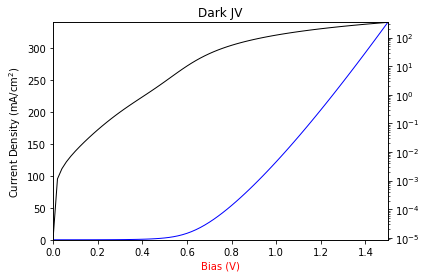

In [ ]:
fig1, ax1 = plt.subplots()
ax1b = ax1.twinx()

ax1_range = [np.min(import_data['V']), np.max(import_data['V']), np.min(import_data['J']), np.max(import_data['J'])]
ax1.axis(ax1_range)

ax1b_range = [0, np.max(import_data['V']), 
              np.min(np.abs(import_data['J'])), np.max(np.abs(import_data['J']))]
ax1b.axis(ax1b_range)

ax1b.semilogy(import_data['V'],np.abs(import_data['J']), 'k-', lw=1)
ax1.plot(import_data['V'],import_data['J'], 'b-', lw=1)

plt.title(r'Dark JV')
ax1.set_ylabel('Current Density (mA/cm$^2$)')
ax1.set_xlabel('Bias (V)', color = 'r')

plt.show()
#ax1b.set_ylabel('Cell Width (cm)', color = 'b')

In [ ]:
data2 = import_data.copy()
data2['dJ_dV'] =  np.gradient(data2['J'], data2['V'])

In [ ]:
data2.head()

,V,J,dJ_dV
0,-1.00,-0.025169,0.029964
1,-0.98,-0.024570,0.029612
2,-0.96,-0.023985,0.029249
3,-0.94,-0.023400,0.028964
4,-0.92,-0.022826,0.028499


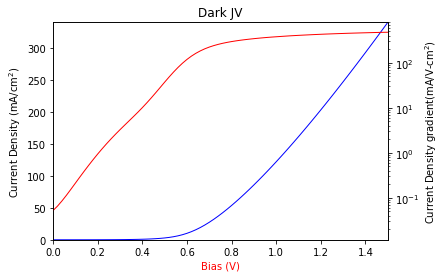

In [ ]:
fig2, ax2 = plt.subplots()
ax2b = ax2.twinx()
#ax1b.plot(num_cells[:,0], num_cells[:,2], 'r-', lw=1,\
         #label = r'Sheet R = %d $\Omega$' %(Rsheet))
#ax1.legend(loc ='upper right', prop={'size':8})
axes_range = [0, np.max(import_data['V']), np.min(import_data['J']), np.max(import_data['J'])]
ax2.axis(axes_range)
ax2.plot(data2['V'], data2['J'], 'b-', lw=1)
ax2b.semilogy(data2['V'], data2['dJ_dV'], 'r-', lw=1)
plt.title(r'Dark JV')
ax2.set_ylabel('Current Density (mA/cm$^2$)')
ax2b.set_ylabel('Current Density gradient(mA/V-cm$^2$)')
ax2.set_xlabel('Bias (V)', color = 'r')
plt.show()

In [ ]:
data2['d2J_dV2'] =  np.gradient(data2['dJ_dV'], data2['V'])
data2.head()

,V,J,dJ_dV,d2J_dV2
0,-1.00,-0.025169,0.029964,-0.017596
1,-0.98,-0.024570,0.029612,-0.017872
2,-0.96,-0.023985,0.029249,-0.016200
3,-0.94,-0.023400,0.028964,-0.018736
4,-0.92,-0.022826,0.028499,-0.025303


In [ ]:
fig3, ax3 = plt.subplots()
ax3b = ax3.twinx()
#ax1b.plot(num_cells[:,0], num_cells[:,2], 'r-', lw=1,\
         #label = r'Sheet R = %d $\Omega$' %(Rsheet))
#ax1.legend(loc ='upper right', prop={'size':8})
axes_range = [0, np.max(import_data['V']), np.min(import_data['J']), np.max(import_data['J'])]
ax3.axis(axes_range)
ax3.plot(data2['V'], data2['J'], 'b-', lw=1)
ax3b.plot(data2['V'], data2['d2J_dV2'], 'r-', lw=1)
plt.title(r'Dark JV')
ax3.set_ylabel('Current Density (mA/cm$^2$)')
ax3b.set_ylabel('Current Density gradient(mA/V$^2$-cm$^2$)')
ax3.set_xlabel('Bias (V)', color = 'r')
plt.show()

In [ ]:
np.argmax(data2['d2J_dV2'])

In [ ]:
data2.idxmax()['d2J_dV2']

In [ ]:
Vturn_on = data2['V'][data2.idxmax()['d2J_dV2']]
round(Vturn_on,3)

In [ ]:
fig4, (ax4_1, ax4_2) = plt.subplots(figsize = (12,4), nrows=1, ncols=2, sharex = True)
ax4_1b = ax4_1.twinx()
ax4_2b = ax4_2.twinx()

axes_range = [np.min(import_data['V']), np.max(import_data['V']), np.min(import_data['J']), np.max(import_data['J'])]
ax4_1.axis(axes_range)
ax4_2.axis(axes_range)

ax4_1.plot(data2['V'], data2['J'], 'b-', lw=1)
ax4_1b.semilogy(data2['V'], data2['dJ_dV'], 'r-', lw=1, label = '1st Derivative')
ax4_1b.legend(loc = (0.02,0.9), prop={'size':10})

ax4_2.plot(data2['V'], data2['J'], 'b-', lw=1)
ax4_2b.plot(data2['V'], data2['d2J_dV2'], 'g-', lw=1, label = '2nd Derivative')
ax4_2b.legend(loc = (0.02,0.9), prop={'size':10})
ax4_2b.text(0.9*np.min(import_data['V']), 0.8*np.max(data2['d2J_dV2']),
            r'V$_{Turn-on}$ = %0.2f V' %Vturn_on, fontsize=12)

ax4_1.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax4_1b.set_ylabel('dJ/dV (mS/cm$^2$)', fontsize = 12)

ax4_2.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax4_2b.set_ylabel('d$^2$J/dV$^2$ (mA/V$^2$-cm$^2$)', fontsize = 12)

ax4_1.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax4_2.set_xlabel('Bias (V)', color = 'r', fontsize = 12)

#ax4.set_title('1st Derivative')
#ax5.set_title('2nd Derivative')

fig4.suptitle('DC Characterization of Dark JV', x = 0.5, y = 1.05, fontsize = 12)

fig4.tight_layout()
plt.show()

In [ ]:
fig1.get_size_inches()

In [ ]:
data2['beta'] = data2['d2J_dV2']/(2*data2['dJ_dV'])

In [ ]:
fig5, ([ax5_1, ax5_2], [ax5_3, ax5_4]) = plt.subplots(figsize = (12,8), nrows=2, ncols=2)

ax5_1b = ax5_1.twinx()
ax5_2b = ax5_2.twinx()
ax5_3b = ax5_3.twinx()
ax5_4b = ax5_4.twinx()

axes_range = [np.min(import_data['V']), np.max(import_data['V']), np.min(import_data['J']), np.max(import_data['J'])]
ax5_1.axis(axes_range)
ax5_2.axis(axes_range)
ax5_3.axis(axes_range)
ax5_4.axis(axes_range)

ax5_1.plot(data2['V'], data2['J'], 'b-', lw=1)
ax5_1b.plot(data2['V'], data2['dJ_dV'], 'r-', lw=1, label = '1st Derivative')
ax5_1b.legend(loc = (0.02,0.9), prop={'size':10})

ax5_2.plot(data2['V'], data2['J'], 'b-', lw=1)
ax5_2b.plot(data2['V'], data2['d2J_dV2'], 'g-', lw=1, label = '2nd Derivative')
ax5_2b.legend(loc = (0.02,0.9), prop={'size':10})
ax5_2b.text(0.9*np.min(import_data['V']), 0.8*np.max(data2['d2J_dV2']),
            r'V$_{Turn-on}$ = %0.2f V' %Vturn_on, fontsize=12)

ax5_3.plot(data2['V'], data2['J'], 'b-', lw=1)
ax5_3b.plot(data2['V'], 1/data2['dJ_dV'], 'r-', lw=1)

ax5_4.plot(data2['V'], data2['J'], 'b-', lw=1)
ax5_4b.plot(data2['V'], data2['beta'], 'g-', lw=1, label = 'Intrinsic Current \n Responsivity')
ax5_4b.legend(loc = (0.02,0.8), prop={'size':10})

ax5_1.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax5_1b.set_ylabel('dJ/dV (mS/cm$^2$)', fontsize = 12)

ax5_2.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax5_2b.set_ylabel('d$^2$J/dV$^2$ (mA/V$^2$-cm$^2$)', fontsize = 12)

ax5_3.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax5_3b.set_ylabel('Differential Resistance ($\Omega$)', fontsize = 12)

ax5_4.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax5_4b.set_ylabel('Responsitivity(A/W)', fontsize = 12)

ax5_1.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax5_2.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax5_3.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax5_4.set_xlabel('Bias (V)', color = 'r', fontsize = 12)

#ax4.set_title('1st Derivative')
#ax5.set_title('2nd Derivative')

fig5.suptitle('DC Characterization', x = 0.5, y = 1.05, fontsize = 12)

fig5.tight_layout()
plt.show()

## Plotting only under Forward Voltage

In [ ]:
 np.max(np.log(np.abs(import_data['J'])))

In [ ]:
fig6, ([ax6_1, ax6_2], [ax6_3, ax6_4]) = plt.subplots(figsize = (12,8), nrows=2, ncols=2)
fig6.set_dpi(200)

ax6_1b = ax6_1.twinx()
ax6_2b = ax6_2.twinx()
ax6_3b = ax6_3.twinx()
ax6_4b = ax6_4.twinx()

axes_range = [0, np.max(import_data['V']), np.min(np.abs(import_data['J'])), np.max(np.abs(import_data['J']))]

#ax6_2b.axis(axes_range)
#ax6_3b.axis(axes_range)
#ax6_4b.axis(axes_range)

#ax6_4b.set_ylim(0,np.max(data2['beta'][data2.loc[data2['V'] == 0.0].index[0]:data2['V'].idxmax()])*1.5)

ax6_1.semilogy(data2['V'], data2['J'], 'b-', lw=1)
ax6_1.axis([0, np.max(data2['V']), np.min(np.abs(data2['J'])), np.max(np.abs(data2['J']))])
ax6_1b.semilogy(data2['V'], data2['dJ_dV'], 'r-', lw=1)
ax6_1b.axis([0, np.max(data2['V']), np.min(np.abs(data2['dJ_dV'])), np.max(np.abs(data2['dJ_dV']))])
#ax6_1b.legend(loc = (0.02,0.9), prop={'size':10})

ax6_2.plot(data2['V'], data2['J'], 'b-', lw=1)
ax6_2.axis([0, np.max(data2['V']), np.min(np.abs(data2['J'])), np.max(np.abs(data2['J']))])
ax6_2b.plot(data2['V'], data2['d2J_dV2'], 'g-', lw=1)
#ax6_2b.legend(loc = (0.02,0.9), prop={'size':10})
ax6_2b.text(np.max(import_data['V'])*0.5, 0.5*np.max(data2['d2J_dV2']),
            r'V$_{Turn-on}$ = %0.2f V' %Vturn_on, fontsize=12)

ax6_3.semilogy(data2['V'], data2['J'], 'b-', lw=1)
ax6_3.axis([0, np.max(data2['V']), np.min(np.abs(data2['J'])), np.max(np.abs(data2['J']))])
ax6_3b.plot(data2['V'], 1/data2['dJ_dV'], 'r-', lw=1)

ax6_4.semilogy(data2['V'], data2['J'], 'b-', lw=1)
ax6_4.axis([0, np.max(data2['V']), np.min(np.abs(data2['J'])), np.max(np.abs(data2['J']))])
ax6_4b.plot(data2['V'], data2['beta'], 'g-', lw=1)
#ax6_4b.legend(loc = 'best', prop={'size':10})

ax6_1.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax6_1b.set_ylabel('dJ/dV (mS/cm$^2$)', fontsize = 12)

ax6_2.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax6_2b.set_ylabel('d$^2$J/dV$^2$ (mA/V$^2$-cm$^2$)', fontsize = 12)

ax6_3.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax6_3b.set_ylabel(r'Differential Resistance (k$\Omega$-cm$^2$)', fontsize = 12)

ax6_4.set_ylabel('Current Density (mA/cm$^2$)', fontsize = 12)
ax6_4b.set_ylabel('Responsitivity(A/W)', fontsize = 12)

ax6_1.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax6_2.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax6_3.set_xlabel('Bias (V)', color = 'r', fontsize = 12)
ax6_4.set_xlabel('Bias (V)', color = 'r', fontsize = 12)

ax6_1.set_title('1st Derivative', fontsize = 12)
ax6_2.set_title('2nd Derivative', fontsize = 12)
ax6_3.set_title('Differential Resistance', fontsize = 12)
ax6_4.set_title('Intrinsic Current '+ r'Responsivity $\beta$$_o$', fontsize = 12)

fig6.suptitle('Forward Bias (Dark) characterization of %s' %sample_name,
              x = 0.5, y = 0.95, fontsize = 13)

fig6.tight_layout()
fig6.subplots_adjust(top=0.88)

fig6.savefig(file_name + '_FB.png', format = 'png', dpi = 'figure')

plt.show()